# Dynamic Mixing
Refer to the work of https://arxiv.org/pdf/2002.08933v1.pdf?ref=bestofml for orignal description. 

## Import modules

In [1]:
import os
import glob
import numpy as np 
import tensorflow as tf 
from random import normalvariate

import librosa
import sounddevice as sd

import matplotlib.pyplot as plt 
import seaborn as sns

## Load data

In [2]:
SAMPLERATE_HZ = 8000

Text(0.5, 1.0, 'Dog Sample Data')

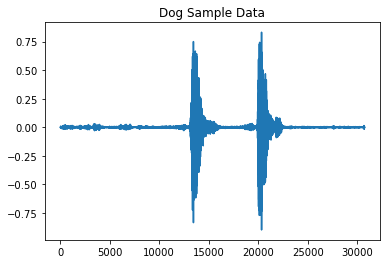

In [3]:
dog_sample, _ = librosa.load('sample_data/dog_sample.wav', sr=SAMPLERATE_HZ)
sd.play(dog_sample, SAMPLERATE_HZ)
status = sd.wait()

plt.plot(range(dog_sample.shape[0]),dog_sample)
plt.title('Dog Sample Data')

Text(0.5, 1.0, 'Music Sample Data')

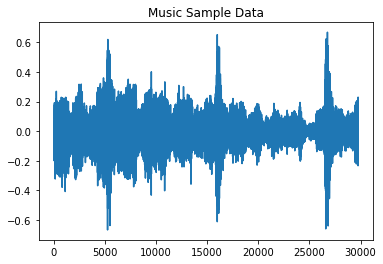

In [4]:
music_sample, _ = librosa.load('sample_data/street_music_sample.wav', sr=SAMPLERATE_HZ)
sd.play(music_sample, SAMPLERATE_HZ)
status = sd.wait()

plt.plot(range(music_sample.shape[0]),music_sample)
plt.title('Music Sample Data')

Text(0.5, 1.0, 'Construction Sample Data')

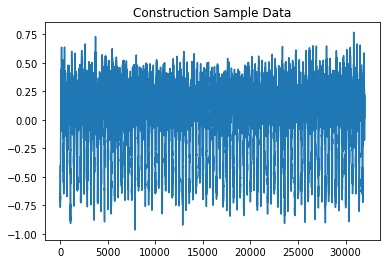

In [5]:
construction_sample, _ = librosa.load('sample_data/construction_sample.wav', sr=SAMPLERATE_HZ)
sd.play(construction_sample, SAMPLERATE_HZ)
status = sd.wait()

plt.plot(range(construction_sample.shape[0]),construction_sample)
plt.title('Construction Sample Data')

## Dynamic Mixing 

In [42]:
def dynamic_mixing(waveforms, length, n_sources):
    waveforms = tf.random.shuffle(waveforms)
    waveforms = tf.stack(waveforms)
    waveforms *= tf.random.uniform((n_sources,1),-1,1)
    mixture = tf.math.reduce_sum(waveforms,axis=0)
    max_amp = tf.math.reduce_max(mixture)
    mix_scaling = 1/max_amp*.9
    sources = mix_scaling*waveforms
    mixture = mix_scaling*mixture
    return tf.clip_by_value(mixture,-1,1), tf.clip_by_value(sources,-1,1)

In [43]:
waveforms = [dog_sample[:25000], music_sample[:25000], construction_sample[:25000]]
mixture, sources = dynamic_mixing(waveforms, 25000, 3)

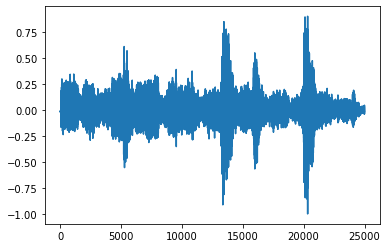

In [44]:
sd.play(mixture, SAMPLERATE_HZ)
status = sd.wait()
plt.plot(range(mixture.shape[0]),mixture)

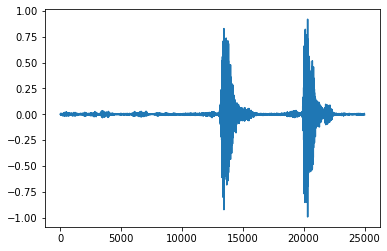

In [45]:
sd.play(sources[0,:], SAMPLERATE_HZ)
status = sd.wait()
plt.plot(range(sources.shape[1]),sources[0,:])

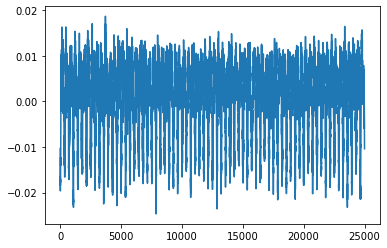

In [46]:
sd.play(sources[1,:], SAMPLERATE_HZ)
status = sd.wait()
plt.plot(range(sources.shape[1]),sources[1,:])

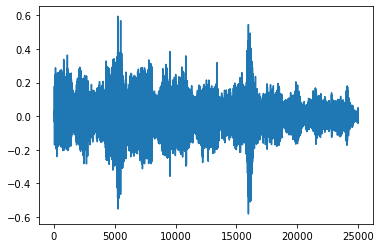

In [47]:
sd.play(sources[2,:], SAMPLERATE_HZ)
status = sd.wait()
plt.plot(range(sources.shape[1]),sources[2,:])